## Here we plot the sending rate for all best conf - trained and tested on itself 
Best scenario, best results, for section: Best configuration results

In [1]:
import pandas as pd
import numpy as np
from plot_cdf import plot_cdf, plot_cdf_multiple
import matplotlib.pyplot as plt
import json
import os
import glob
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from best_algs import best_models_dict

In [2]:
def make_bandwidth_series(trace_path, step_time):
    #read bandwidth file and create series
    #index timestamps, values bandwidth
    with open(trace_path, "r") as f:
        d = json.load(f)
    df = pd.DataFrame(d["uplink"]["trace_pattern"])
    time = [0] + list(df["duration"].cumsum())
    capacities = [df["capacity"].iloc[0]] + list(df["capacity"])
    s = pd.Series(index=pd.to_datetime(time, unit="ms"), data=capacities)
    capacities = s.resample(f"{step_time}ms").bfill()
    return capacities

In [3]:
# take all conf like this from best_conf
# conf_name = "TD3_4G_3mbps_200_delay_True_norm_states_True_tuned_False_reward_profile_0_seed_22"

In [4]:
from best_algs import best_models_dict
list_conf_names = [d[200] for d in best_models_dict.values()]
print("Len list_conf_names: ", len(list_conf_names)) 

Len list_conf_names:  9


In [5]:
list_conf_names

['SAC_WIRED_900kbps_200_delay_True_norm_states_True_tuned_True_reward_profile_0_seed_22',
 'TD3_WIRED_200kbps_200_delay_False_norm_states_True_tuned_False_reward_profile_0_seed_22',
 'TD3_WIRED_35mbps_200_delay_True_norm_states_True_tuned_False_reward_profile_0_seed_22',
 'TD3_4G_700kbps_200_delay_True_norm_states_True_tuned_False_reward_profile_0_seed_22',
 'SAC_4G_3mbps_200_delay_True_norm_states_True_tuned_True_reward_profile_0_seed_22',
 'TD3_4G_500kbps_200_delay_True_norm_states_True_tuned_True_reward_profile_0_seed_22',
 'TD3_5G_12mbps_200_delay_True_norm_states_True_tuned_False_reward_profile_0_seed_22',
 'TD3_5G_13mbps_200_delay_False_norm_states_True_tuned_False_reward_profile_0_seed_22',
 'TD3_trace_300k_200_delay_True_norm_states_True_tuned_True_reward_profile_0_seed_22']

## Look at all of them

../output_mp/rates_delay_loss_SAC_WIRED_900kbps_200_delay_True_norm_states_True_tuned_True_reward_profile_0_seed_22.pickle
WIRED_900kbps
Trace: ./traces/WIRED_900kbps.json


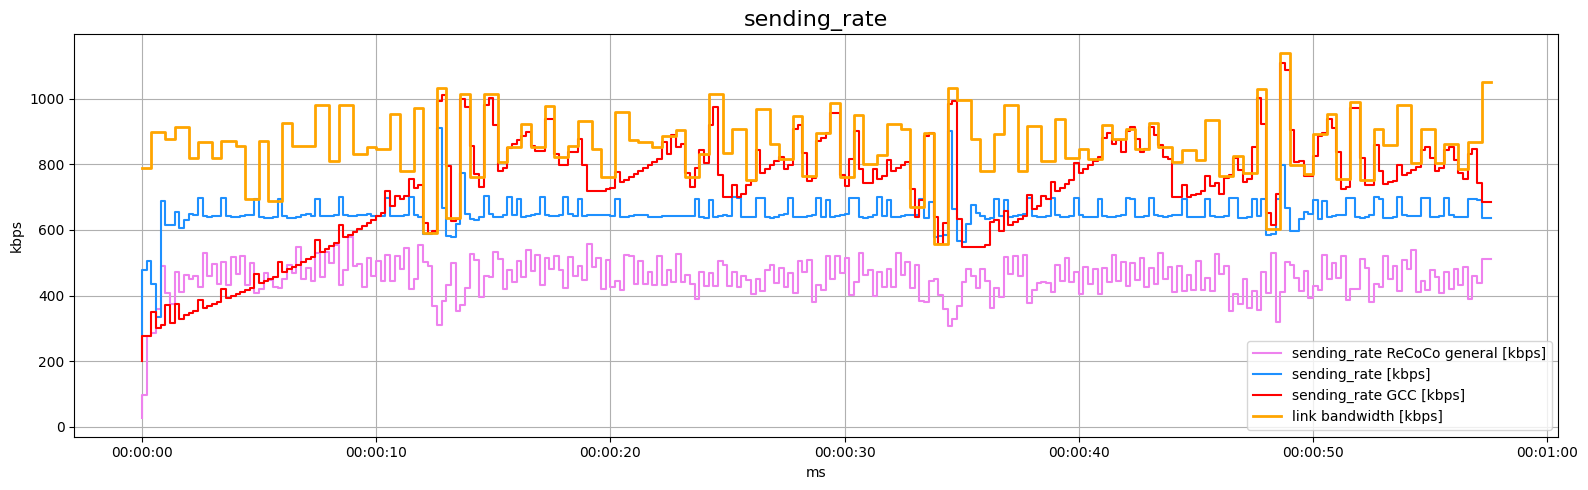

[0.         0.00011574 0.00023148 0.00034722 0.00046296 0.0005787
 0.00069444]
../output_mp/rates_delay_loss_TD3_WIRED_200kbps_200_delay_False_norm_states_True_tuned_False_reward_profile_0_seed_22.pickle
WIRED_200kbps
Trace: ./traces/WIRED_200kbps.json


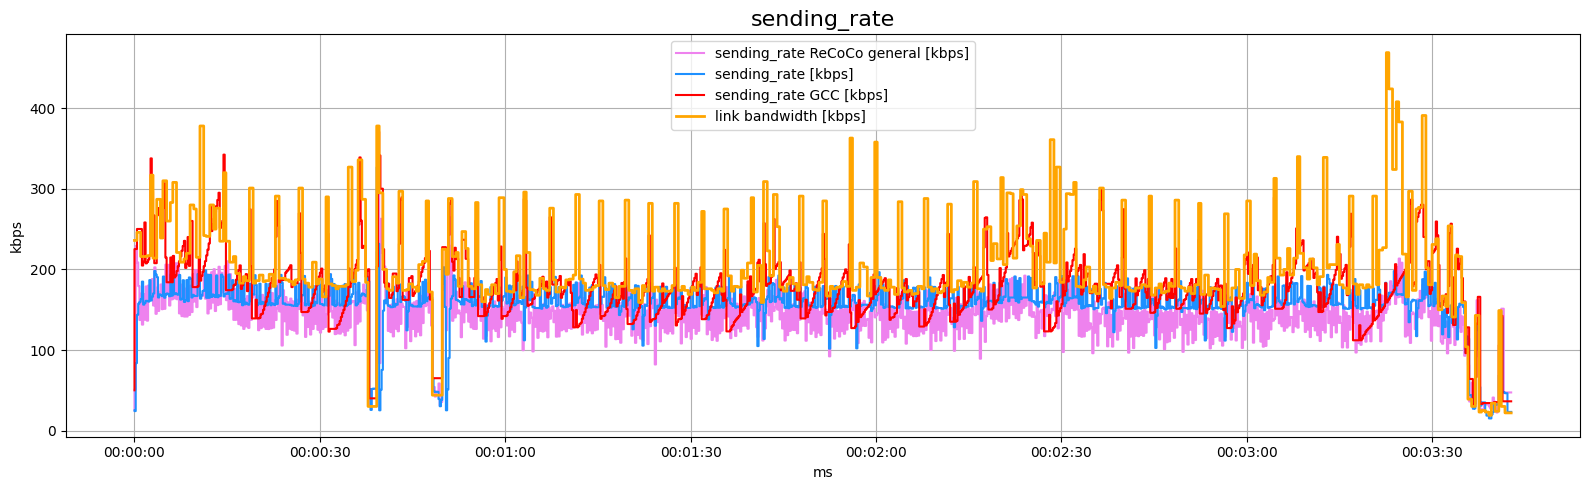

[0.         0.00034722 0.00069444 0.00104167 0.00138889 0.00173611
 0.00208333 0.00243056]
../output_mp/rates_delay_loss_TD3_WIRED_35mbps_200_delay_True_norm_states_True_tuned_False_reward_profile_0_seed_22.pickle
WIRED_35mbps
Trace: ./traces/WIRED_35mbps.json


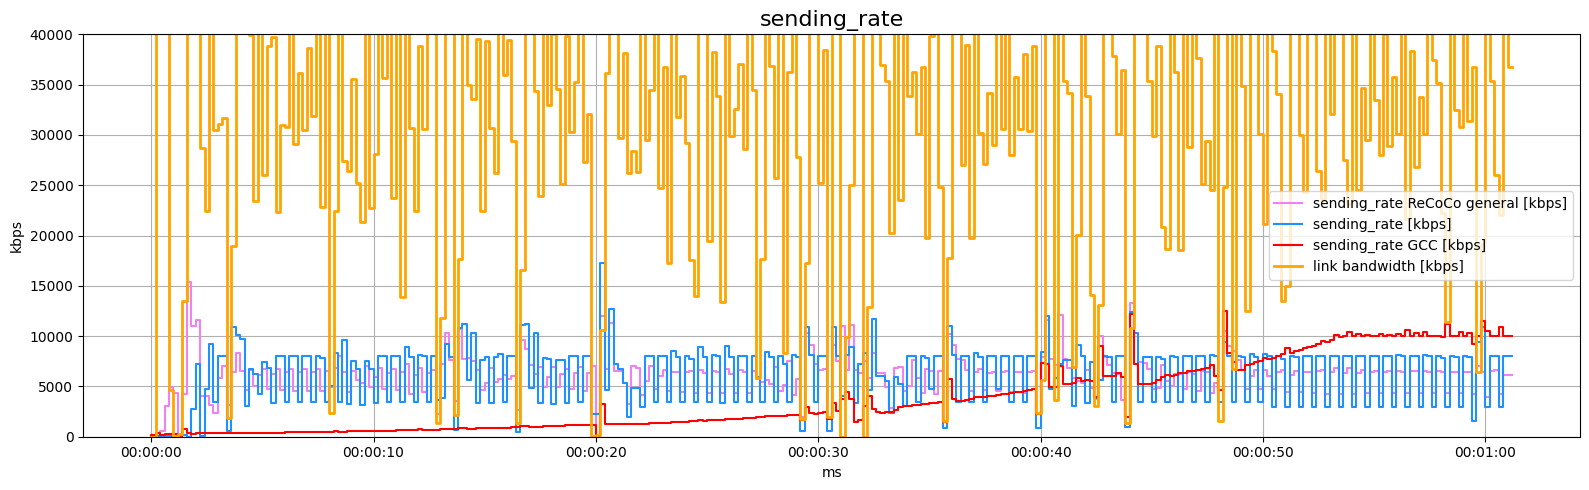

[0.         0.00011574 0.00023148 0.00034722 0.00046296 0.0005787
 0.00069444]
../output_mp/rates_delay_loss_TD3_4G_700kbps_200_delay_True_norm_states_True_tuned_False_reward_profile_0_seed_22.pickle
4G_700kbps
Trace: ./traces/4G_700kbps.json


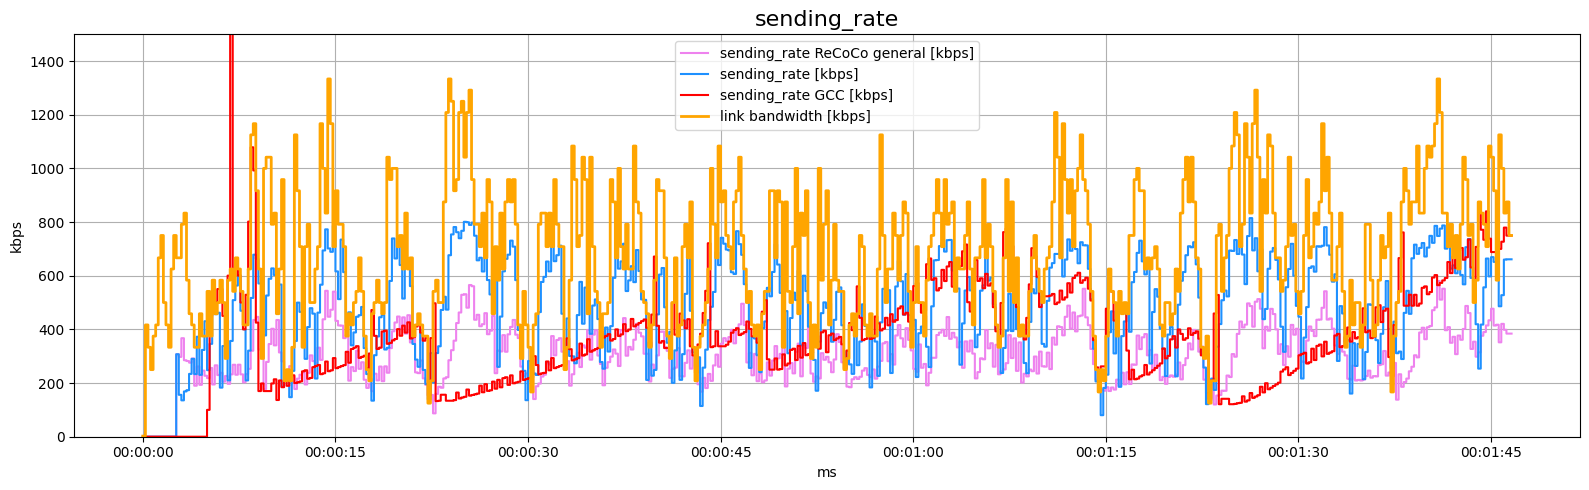

[0.         0.00017361 0.00034722 0.00052083 0.00069444 0.00086806
 0.00104167 0.00121528]
../output_mp/rates_delay_loss_SAC_4G_3mbps_200_delay_True_norm_states_True_tuned_True_reward_profile_0_seed_22.pickle
4G_3mbps
Trace: ./traces/4G_3mbps.json


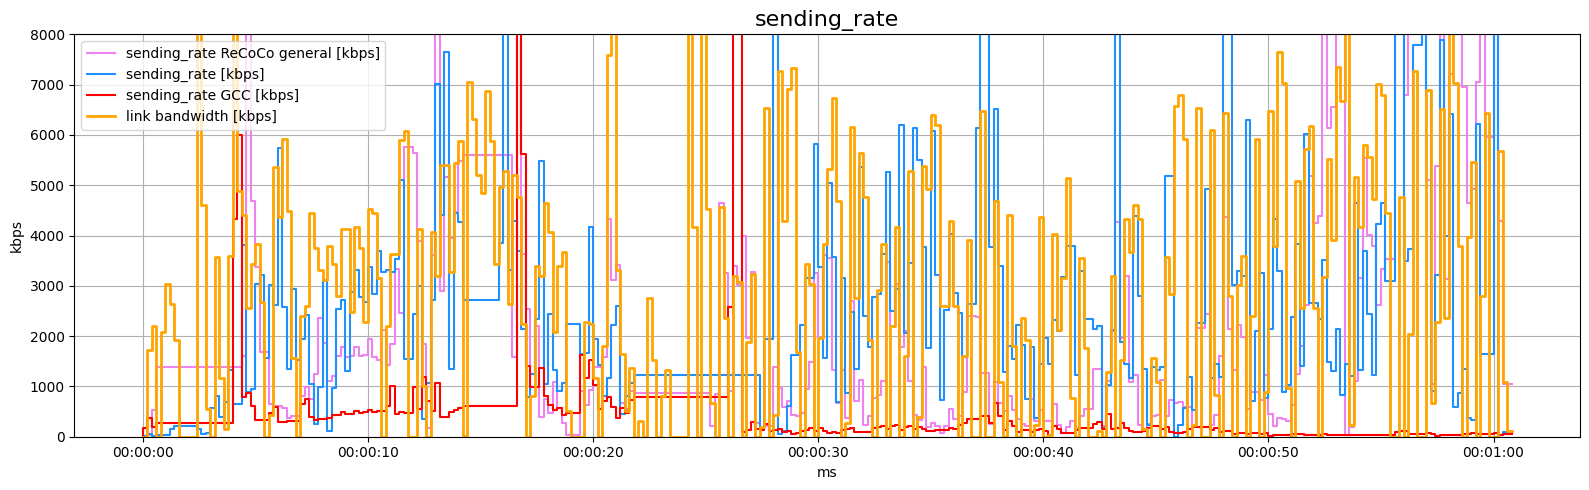

[0.         0.00011574 0.00023148 0.00034722 0.00046296 0.0005787
 0.00069444]
../output_mp/rates_delay_loss_TD3_4G_500kbps_200_delay_True_norm_states_True_tuned_True_reward_profile_0_seed_22.pickle
4G_500kbps
Trace: ./traces/4G_500kbps.json


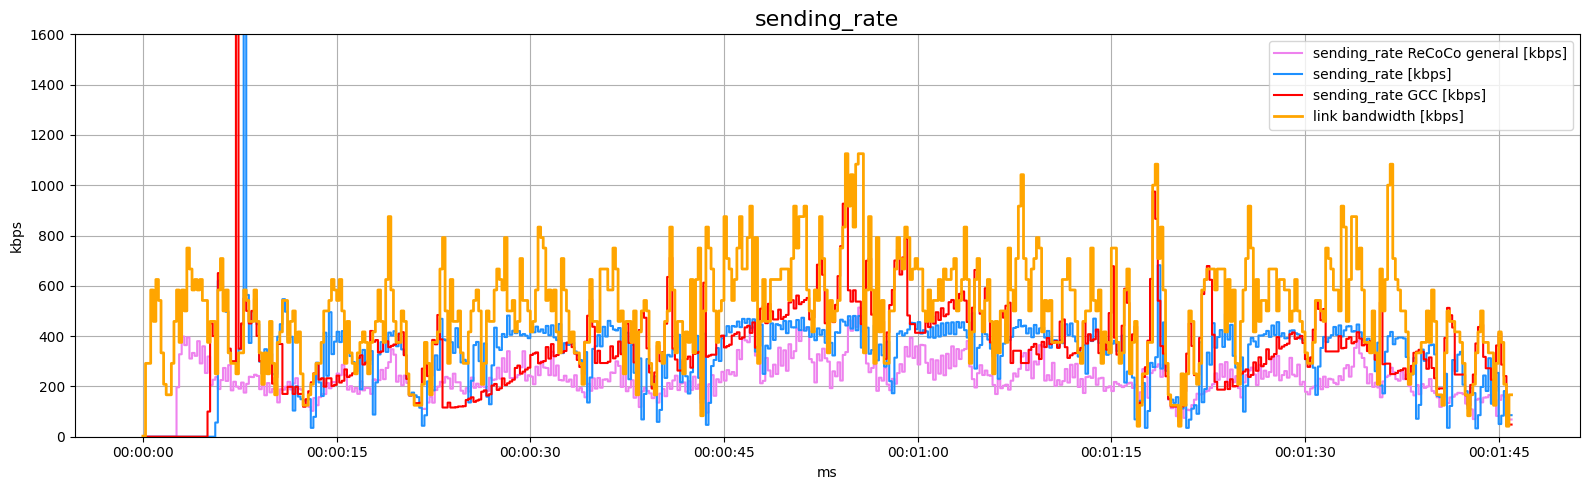

[0.         0.00017361 0.00034722 0.00052083 0.00069444 0.00086806
 0.00104167 0.00121528]
../output_mp/rates_delay_loss_TD3_5G_12mbps_200_delay_True_norm_states_True_tuned_False_reward_profile_0_seed_22.pickle
5G_12mbps
Trace: ./traces/5G_12mbps.json


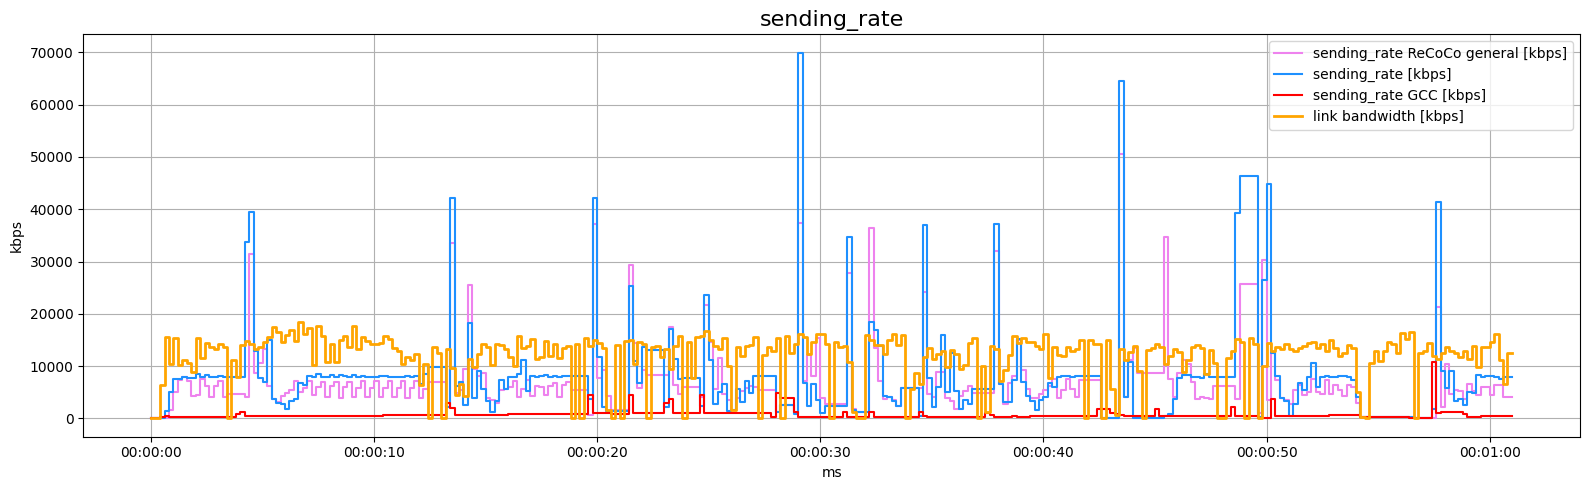

[0.         0.00011574 0.00023148 0.00034722 0.00046296 0.0005787
 0.00069444]
../output_mp/rates_delay_loss_TD3_5G_13mbps_200_delay_False_norm_states_True_tuned_False_reward_profile_0_seed_22.pickle
5G_13mbps
Trace: ./traces/5G_13mbps.json


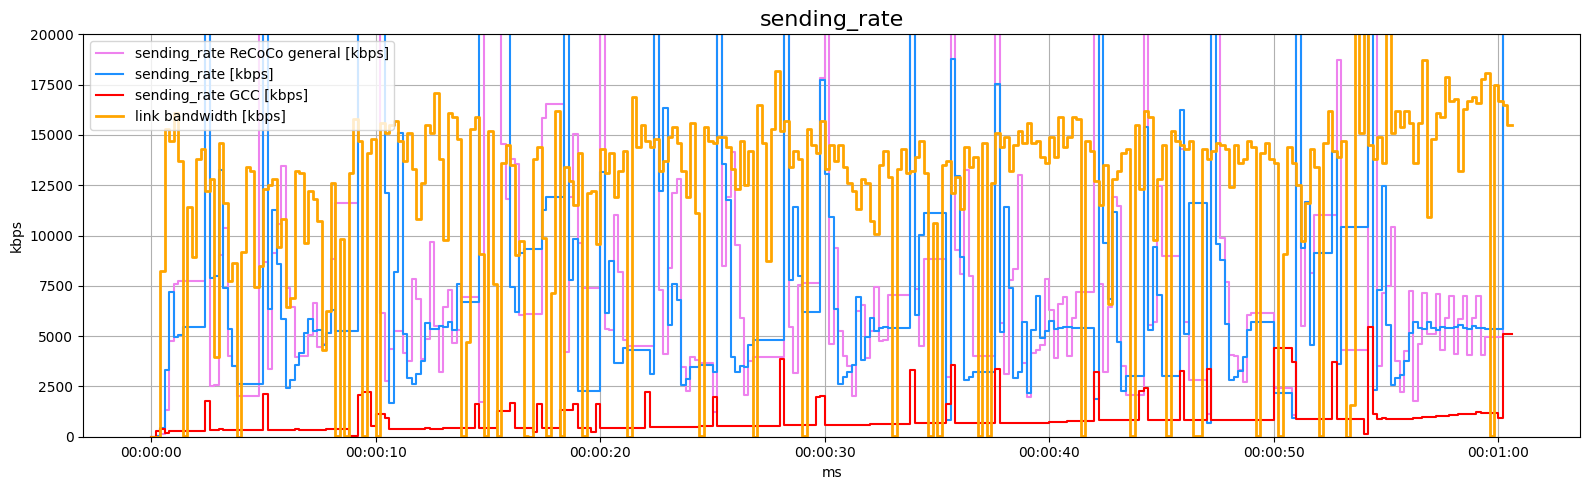

[0.         0.00011574 0.00023148 0.00034722 0.00046296 0.0005787
 0.00069444]
../output_mp/rates_delay_loss_TD3_trace_300k_200_delay_True_norm_states_True_tuned_True_reward_profile_0_seed_22.pickle
trace_300k
Trace: ./traces/trace_300k.json


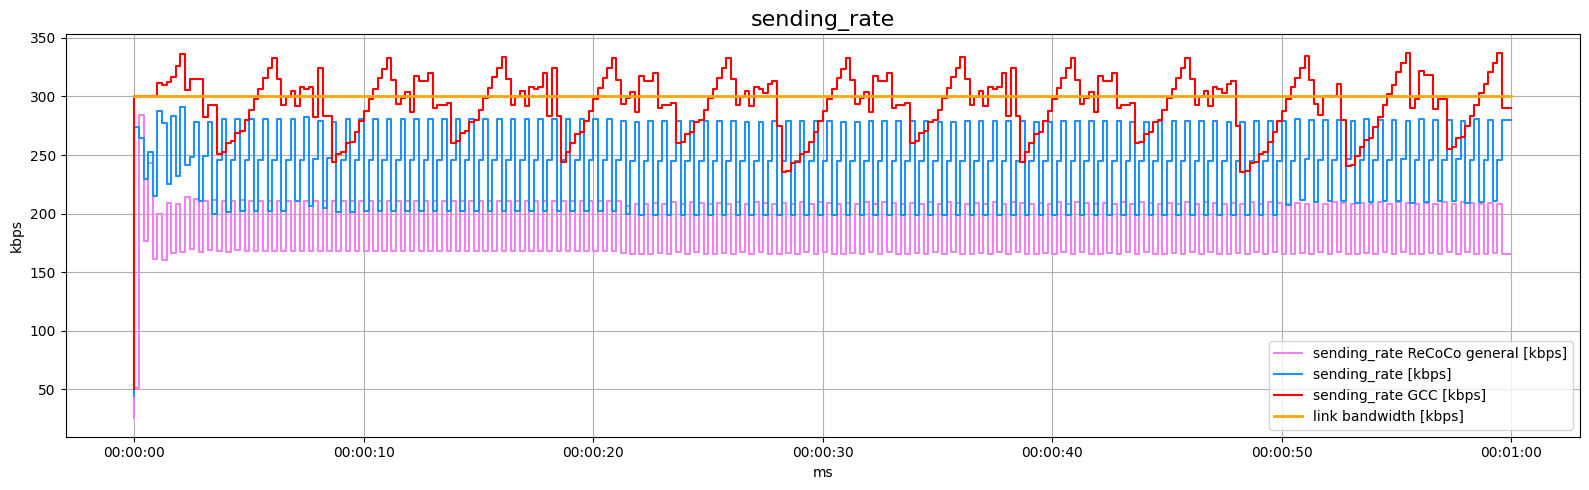

[0.         0.00011574 0.00023148 0.00034722 0.00046296 0.0005787
 0.00069444]


In [6]:
m = 9
plot_gcc = True
plot_hrcc = False
plot_gap = True

prefix = "../output_mp/rates_delay_loss_"
suffix = ".pickle"

# pickle_path_gap = "../output/rates_delay_loss_test_gap_to_baseline_v2.pickle"
pickle_path_gap = "../output/rates_delay_loss_test_random_traces_v4.pickle"
l_rate_gap = pd.read_pickle(pickle_path_gap)



for conf_name in list_conf_names:
    


    pickle_path = prefix+conf_name+suffix
    print(pickle_path)
    l_rate = pd.read_pickle(pickle_path)
    time_step = int(pickle_path.split("/")[2].split("_")[6])
    # print(time_step)
    REAL_NAME = pickle_path.split("/")[2].split("_")[4] + "_" + pickle_path.split("/")[2].split("_")[5]
    print(REAL_NAME)

    pickle_path_gcc = f"../apply_model/results_gcc/rates_delay_loss_gcc_{REAL_NAME}.pickle"
    l_rate_gcc = pd.read_pickle(pickle_path_gcc)
    trace_name = l_rate_gcc["trace_name"]
    # print(trace_name)

    pickle_path_hrcc = f"../apply_model/results_hrcc/rates_delay_loss_hrcc_{REAL_NAME}.pickle"
    l_rate_hrcc = pd.read_pickle(pickle_path_gcc)
    

    for key in l_rate.keys():

        print(f"Trace: {key}")
        colors = iter(["dodgerblue", "teal", "indianred", "olive", "yellow", "green"])

        # for metric in ["bandwidth_prediction", "sending_rate", "receiving_rate", "Ru", "delay", "Rd", "loss_ratio", "Rl", "reward"]:
        for metric in ["sending_rate"]: #reward
            #Define capacity

            trace_path = "../" + key.split("/")[1] + "/" + key.split("/")[2]
            capacities = make_bandwidth_series(trace_path, time_step)

            df_rate = pd.DataFrame(l_rate[key][m][metric], columns=[metric])
            if plot_gcc and (metric != "reward"):
                df_rate_gcc = pd.DataFrame(l_rate_gcc[metric], columns=[metric])
                df_rate = df_rate.join(df_rate_gcc, rsuffix="_gcc")
            if plot_hrcc and (metric != "reward"):
                df_rate_hrcc = pd.DataFrame(l_rate_hrcc[metric], columns=[metric])
                df_rate = df_rate.join(df_rate_hrcc, rsuffix="_hrcc")
            if plot_gap:
                df_rate_gap = pd.DataFrame(l_rate_gap[key][metric], columns=[metric])
                df_rate = df_rate.join(df_rate_gap, rsuffix="_one_model")

            t = np.arange(len(df_rate))*time_step
            df_rate["time"] = pd.to_datetime(t, unit="ms")
            df_rate.set_index("time", inplace=True)

            df = df_rate.join(pd.DataFrame(capacities, columns=["capacity"]))

            if metric in ["bandwidth_prediction", "sending_rate", "receiving_rate"]:

                fig, ax = plt.subplots(figsize=(16,5))
                plt.title(metric, fontsize=16)
                if plot_gap:
                    plt.step(df.index, df[f"{metric}_one_model"]/1000, label=f"{metric} ReCoCo general [kbps]", color="violet")
                # color=next(colors)
                plt.step(df.index, df[metric]/1000, label=f"{metric} [kbps]", color="dodgerblue")
                if plot_gcc and (metric != "reward"):
                    plt.step(df.index, df[f"{metric}_gcc"]/1000, label=f"{metric} GCC [kbps]", color="red")
                if plot_hrcc and (metric != "reward"):
                    plt.step(df.index, df[f"{metric}_hrcc"]/1000, label=f"{metric} HRCC [kbps]", color="green")

                plt.step(df.index, df["capacity"], lw=2, label="link bandwidth [kbps]", color="orange")

                plt.legend()
                plt.ylabel("kbps")
                plt.xlabel("ms")
                plt.grid()
                if REAL_NAME == "WIRED_200kbps":
                    # plt.xlim(0.00208333,)
                    pass
                if REAL_NAME == "WIRED_35mbps":
                    plt.ylim((0, 40000))
                elif REAL_NAME == "4G_700kbps":
                    plt.ylim(0, 1500)
                elif REAL_NAME == "4G_3mbps":
                    plt.ylim(0,8000)
                elif REAL_NAME == "4G_500kbps":
                    plt.ylim(0,1600)
                elif REAL_NAME == "5G_13mbps":
                    plt.ylim(0,20000)
                
                plt.tight_layout()

            else:
                if plot_gap:
                    plt.step(df.index, df[f"{metric}_one_model"], label=f"{metric} ReCoCo general", color="red")
                fig, ax = plt.subplots(figsize=(16,5))
                plt.title(metric, fontsize=16)
                plt.step(df.index, df[metric], label=f"{metric}", color="dodgerblue")
                if plot_gcc and (metric != "reward"):
                    plt.step(df.index, df[f"{metric}_gcc"], label=f"{metric} GCC", color="red")
                plt.ylabel(metric)
                plt.xlabel("ms")
                plt.legend()
                plt.grid()

                plt.tight_layout()

            plt.show()
            print(ax.get_xticks())


## Plot just two

### Get data

In [7]:
m = 9
plot_gcc = True
plot_hrcc = False
plot_gap = True

prefix = "../output_mp/rates_delay_loss_"
suffix = ".pickle"

pickle_path_gap = "../output/rates_delay_loss_test_random_traces_v4.pickle"
l_rate_gap = pd.read_pickle(pickle_path_gap)


for conf_name in list_conf_names:
    
    if (not "4G_700kbps" in conf_name) and (not "WIRED_200kbps" in conf_name) and (not "trace_300k" in conf_name):
        continue

    pickle_path = prefix+conf_name+suffix
    print(pickle_path)
    l_rate = pd.read_pickle(pickle_path)
    time_step = int(pickle_path.split("/")[2].split("_")[6])
    # print(time_step)
    REAL_NAME = pickle_path.split("/")[2].split("_")[4] + "_" + pickle_path.split("/")[2].split("_")[5]
    print(REAL_NAME)

    pickle_path_gcc = f"../apply_model/results_gcc/rates_delay_loss_gcc_{REAL_NAME}.pickle"
    l_rate_gcc = pd.read_pickle(pickle_path_gcc)
    trace_name = l_rate_gcc["trace_name"]
    # print(trace_name)

    pickle_path_hrcc = f"../apply_model/results_hrcc/rates_delay_loss_hrcc_{REAL_NAME}.pickle"
    l_rate_hrcc = pd.read_pickle(pickle_path_gcc)

    for key in l_rate.keys():

        print(f"Trace: {key}")
        colors = iter(["dodgerblue", "teal", "indianred", "olive", "yellow", "green"])

        # for metric in ["bandwidth_prediction", "sending_rate", "receiving_rate", "Ru", "delay", "Rd", "loss_ratio", "Rl", "reward"]:
        for metric in ["sending_rate"]: #reward
            #Define capacity

            trace_path = "../" + key.split("/")[1] + "/" + key.split("/")[2]
            capacities = make_bandwidth_series(trace_path, time_step)

            df_rate = pd.DataFrame(l_rate[key][m][metric], columns=[metric])
            if plot_gcc and (metric != "reward"):
                df_rate_gcc = pd.DataFrame(l_rate_gcc[metric], columns=[metric])
                df_rate = df_rate.join(df_rate_gcc, rsuffix="_gcc")
            if plot_hrcc and (metric != "reward"):
                df_rate_hrcc = pd.DataFrame(l_rate_hrcc[metric], columns=[metric])
                df_rate = df_rate.join(df_rate_hrcc, rsuffix="_hrcc")
            if plot_gap:
                df_rate_gap = pd.DataFrame(l_rate_gap[key][metric], columns=[metric])
                df_rate = df_rate.join(df_rate_gap, rsuffix="_one_model")

            t = np.arange(len(df_rate))*time_step
            df_rate["time"] = pd.to_datetime(t, unit="ms")
            df_rate.set_index("time", inplace=True)
            
            print(key)
            
            if "4G_700kbps" in key:
                df_4G_700 = df_rate.join(pd.DataFrame(capacities, columns=["capacity"]))
            elif "WIRED_200kbps" in key:
                df_wired_200 = df_rate.join(pd.DataFrame(capacities, columns=["capacity"]))
            elif "trace_300k" in key:
                df_trace_300k = df_rate.join(pd.DataFrame(capacities, columns=["capacity"]))



../output_mp/rates_delay_loss_TD3_WIRED_200kbps_200_delay_False_norm_states_True_tuned_False_reward_profile_0_seed_22.pickle
WIRED_200kbps
Trace: ./traces/WIRED_200kbps.json
./traces/WIRED_200kbps.json
../output_mp/rates_delay_loss_TD3_4G_700kbps_200_delay_True_norm_states_True_tuned_False_reward_profile_0_seed_22.pickle
4G_700kbps
Trace: ./traces/4G_700kbps.json
./traces/4G_700kbps.json
../output_mp/rates_delay_loss_TD3_trace_300k_200_delay_True_norm_states_True_tuned_True_reward_profile_0_seed_22.pickle
trace_300k
Trace: ./traces/trace_300k.json
./traces/trace_300k.json


### Plot Wired_200

In [8]:
from matplotlib import rcParams
#IEEE Times New Roman (Nimbus Roman)
rcParams['text.latex.preamble'] = r"\usepackage{mathptmx}"

#Latex in general
rcParams['font.family'] = "serif"
rcParams['font.serif'] = ['Computer Modern']
rcParams['text.usetex'] = True

In [9]:
fontsize = 16
metric = "sending_rate"
figsze = (14,5)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


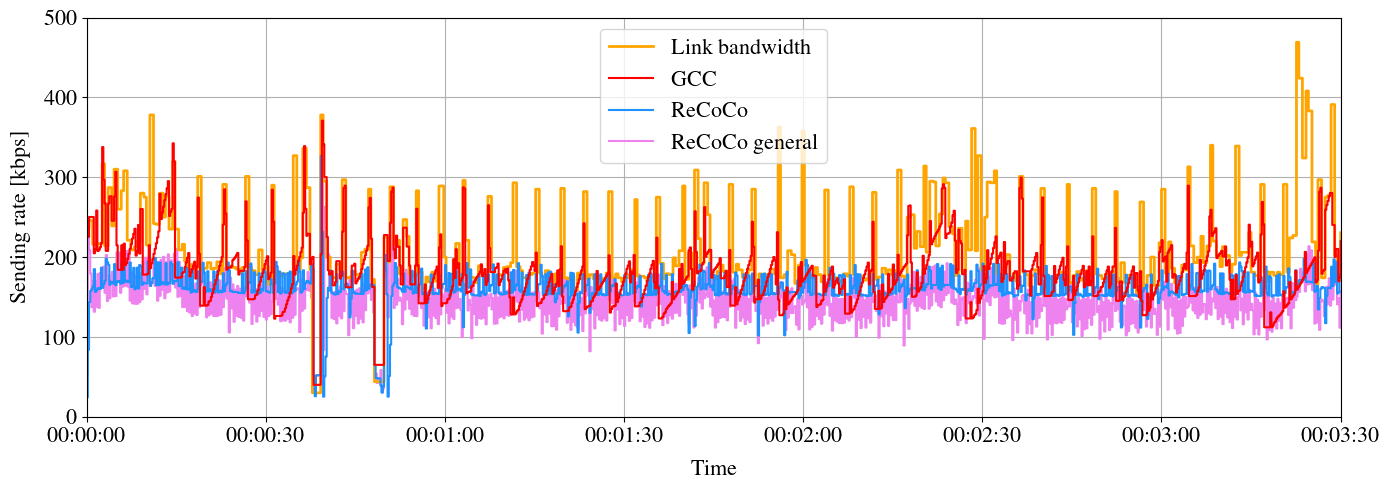

In [10]:
plot_gap=True

fig, ax = plt.subplots(figsize=figsze)
df = df_wired_200.copy()
# df = df_wired_200[:525].copy()



if plot_gap and (metric != "reward"):
    plt.step(df.index, df[f"{metric}_one_model"]/1000, label=f"ReCoCo general", color="violet")


plt.step(df.index, df["capacity"], lw=2, label="Link bandwidth", color="orange")
plt.step(df.index, df[metric]/1000, label=f"ReCoCo", color="dodgerblue")

if plot_gcc and (metric != "reward"):
    plt.step(df.index, df[f"{metric}_gcc"]/1000, label=f"GCC", color="red")

if plot_hrcc and (metric != "reward"):
    plt.step(df.index, df[f"{metric}_hrcc"]/1000, label=f"HRCC", color="green")

plt.ylabel("Sending rate [kbps]", fontsize=fontsize, labelpad=10)
plt.xlabel("Time", fontsize=fontsize, labelpad=10)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.grid()

handles, labels = ax.get_legend_handles_labels()
order = [1,3,2,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=fontsize, loc="upper center")
# plt.legend(fontsize=fontsize, loc="upper center")
# print(ax.get_xticks())

plt.ylim((0, 500))
plt.xlim(0, 0.00243056)
# plt.xlim(0, 0.00121528)

plt.tight_layout()
plt.savefig("plots/wired_200_sending_rate2.pdf")

### Plot 4G 700

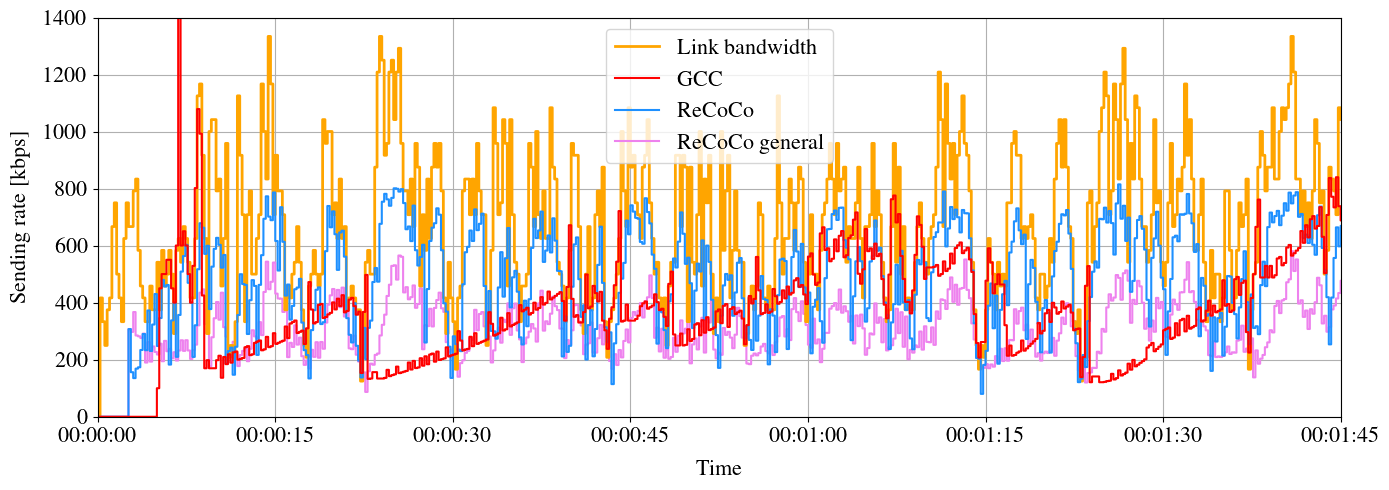

In [11]:
plot_gap = True

df = df_4G_700.copy()

fig, ax = plt.subplots(figsize=figsze)

if plot_gap and (metric != "reward"):
    plt.step(df.index, df[f"{metric}_one_model"]/1000, label=f"ReCoCo general", color="violet")

plt.step(df.index, df["capacity"], lw=2, label="Link bandwidth", color="orange")
plt.step(df.index, df[metric]/1000, label=f"ReCoCo", color="dodgerblue")
if plot_gcc and (metric != "reward"):
    plt.step(df.index, df[f"{metric}_gcc"]/1000, label=f"GCC", color="red")
if plot_hrcc and (metric != "reward"):
    plt.step(df.index, df[f"{metric}_hrcc"]/1000, label=f"HRCC", color="green")

plt.ylabel("Sending rate [kbps]", fontsize=fontsize, labelpad=10)
plt.xlabel("Time", fontsize=fontsize, labelpad=10)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.grid()
handles, labels = ax.get_legend_handles_labels()
order = [1,3,2,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=fontsize, loc="upper center")

plt.ylim(0, 1400)
# ax.get_xticks()
plt.xlim(0, 0.00121528)

plt.tight_layout()
# plt.savefig("plots/4G_700_sending_rate.png")
plt.savefig("plots/4G_700_sending_rate2.pdf")


### Plot it for one column width

In [32]:
df_4G_700.reset_index()[df_4G_700.reset_index()["time"] == "1970-01-01 00:01:00.000"]
#loc["1970-01-01 00:00:45.000"]

,time,sending_rate,sending_rate_gcc,sending_rate_one_model,capacity
300,1970-01-01 00:01:00,411000.0,395400.0,321760.0,333.44


[0.         0.00011574 0.00023148 0.00034722 0.00046296 0.0005787
 0.00069444 0.00081019]


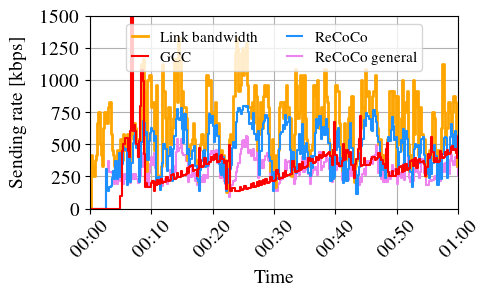

In [52]:
plot_gap = True
import matplotlib.dates as mdates

xfmt = mdates.DateFormatter('%M:%S')

df = df_4G_700[:351].copy()


fontsize=14
figsize=(5,3)
fig, ax = plt.subplots(figsize=figsize)


if plot_gap and (metric != "reward"):
    plt.step(df.index, df[f"{metric}_one_model"]/1000, label=f"ReCoCo general", color="violet")

plt.step(df.index, df["capacity"], lw=2, label="Link bandwidth", color="orange")
plt.step(df.index, df[metric]/1000, label=f"ReCoCo", color="dodgerblue")
if plot_gcc and (metric != "reward"):
    plt.step(df.index, df[f"{metric}_gcc"]/1000, label=f"GCC", color="red")
if plot_hrcc and (metric != "reward"):
    plt.step(df.index, df[f"{metric}_hrcc"]/1000, label=f"HRCC", color="green")

plt.ylabel("Sending rate [kbps]", fontsize=fontsize, labelpad=10)
plt.xlabel("Time", fontsize=fontsize, labelpad=5)
plt.xticks(fontsize=fontsize, rotation=45)
ax.xaxis.set_major_formatter(xfmt)
plt.yticks(fontsize=fontsize)
plt.grid()
handles, labels = ax.get_legend_handles_labels()
order = [1,3,2,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=fontsize-3, loc="upper center",
          handlelength=1, labelspacing = 0.3, ncol=2)
# plt.legend(loc="lower right", fontsize=fontsize-2, title="Random seed",
#            handlelength=1, title_fontsize=12, labelspacing = 0.3, ncol=2)

plt.ylim(0, 1500)
print(ax.get_xticks())
plt.xlim(0,0.00069445)

plt.tight_layout()

plt.savefig("plots/4G_700_sending_rate3.pdf")

## Plot trace 300k

[0.         0.00011574 0.00023148 0.00034722 0.00046296 0.0005787
 0.00069444]


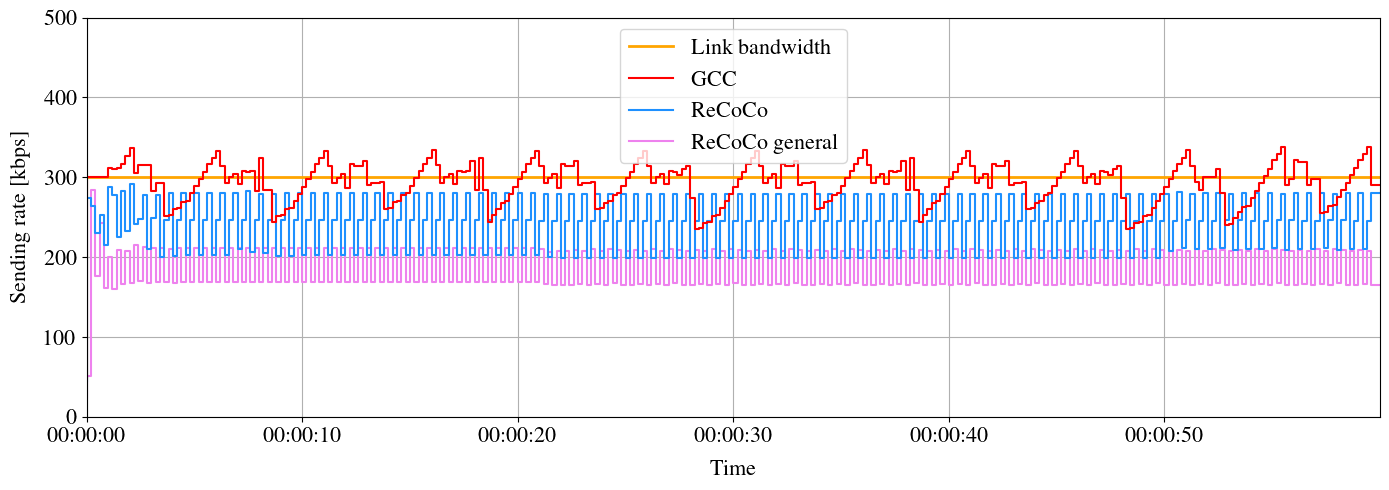

In [12]:
plot_gap = True

df = df_trace_300k.copy()

fig, ax = plt.subplots(figsize=figsze)

if plot_gap and (metric != "reward"):
    plt.step(df.index, df[f"{metric}_one_model"]/1000, label=f"ReCoCo general", color="violet")

plt.step(df.index, df["capacity"], lw=2, label="Link bandwidth", color="orange")
plt.step(df.index, df[metric]/1000, label=f"ReCoCo", color="dodgerblue")
if plot_gcc and (metric != "reward"):
    plt.step(df.index, df[f"{metric}_gcc"]/1000, label=f"GCC", color="red")
if plot_hrcc and (metric != "reward"):
    plt.step(df.index, df[f"{metric}_hrcc"]/1000, label=f"HRCC", color="green")

plt.ylabel("Sending rate [kbps]", fontsize=fontsize, labelpad=10)
plt.xlabel("Time", fontsize=fontsize, labelpad=10)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.grid()
handles, labels = ax.get_legend_handles_labels()
order = [1,3,2,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=fontsize, loc="upper center")

plt.ylim(0, 500)
print(ax.get_xticks())
plt.xlim(0, 0.00069444)

plt.tight_layout()
plt.savefig("plots/trace_300k_sending_rate2.pdf")

# Plotting for presentation INW

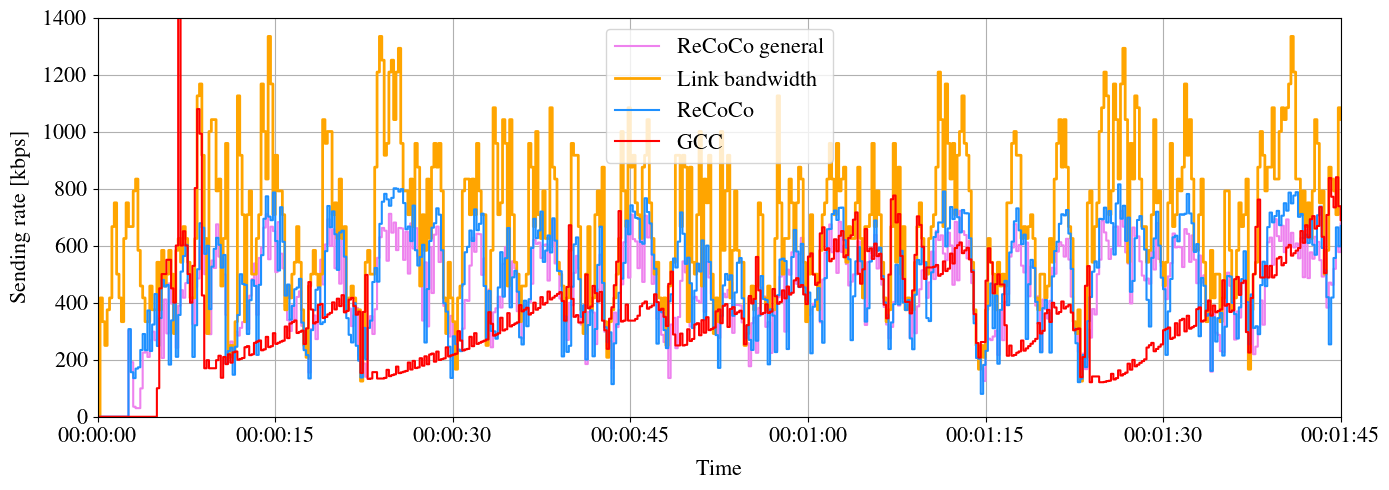

In [33]:
plot_gap = True
plot_gcc = True
plot_best = True

df = df_4G_700.copy()

fig, ax = plt.subplots(figsize=figsze)

if plot_gap and (metric != "reward"):
    plt.step(df.index, df[f"{metric}_one_model"]/1000, label=f"ReCoCo general", color="violet")

plt.step(df.index, df["capacity"], lw=2, label="Link bandwidth", color="orange")
if plot_best:
    plt.step(df.index, df[metric]/1000, label=f"ReCoCo", color="dodgerblue")
if plot_gcc and (metric != "reward"):
    plt.step(df.index, df[f"{metric}_gcc"]/1000, label=f"GCC", color="red")
if plot_hrcc and (metric != "reward"):
    plt.step(df.index, df[f"{metric}_hrcc"]/1000, label=f"HRCC", color="green")

plt.ylabel("Sending rate [kbps]", fontsize=fontsize, labelpad=10)
plt.xlabel("Time", fontsize=fontsize, labelpad=10)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.grid()
plt.legend(fontsize=fontsize, loc="upper center")

plt.ylim(0, 1400)
# ax.get_xticks()
plt.xlim(0, 0.00121528)

ax.tick_params(axis='both', which='minor', length=0)
ax.tick_params(axis='both', which='major', direction='out')

plt.tight_layout()
# plt.savefig("plots/4G_700_bandwidth_gcc_best_gap.png")
# plt.savefig("plots/4G_700_sending_rate.pdf")